In [ ]:
! pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install keras numpy matplotlib mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn

In [39]:
#load dataset
(xtrain, ytrain) , (xtest, ytest)= keras.datasets.mnist.load_data()  

In [40]:
xtrain.shape

(60000, 28, 28)

In [41]:
xtrain[110].shape

(28, 28)

In [ ]:
xtrain[1]

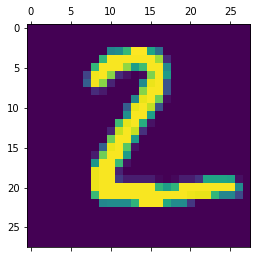

In [44]:
plt.matshow(xtest[1])

In [45]:
#normalization
xtest=xtest/255
xtrain=xtrain/255

In [ ]:
xtest[1]

In [47]:
#flatten to image into 28*28 to 784
xtrain=xtrain.reshape(-1,784)
xtest=xtest.reshape(-1,784)

In [48]:
xtrain[1].shape

(784,)

In [49]:
#build a model
#scquential
# 3 layers, first 2 layers 64 neuron and relu function
# output layer 10 neuron and softmax function

model = keras.Sequential()
model.add(Dense(64,activation='relu', input_dim=784)) # input layer
model.add(Dense(64,activation='relu')) #hidden
model.add(Dense(10,activation='softmax')) #output


In [50]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [51]:
#train the model
model.fit(xtrain,
          to_categorical(ytrain),
          epochs=10,
          batch_size=32,
          )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2795 - accuracy: 0.9178
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1251 - accuracy: 0.9626
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0920 - accuracy: 0.9721
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0716 - accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0595 - accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0515 - accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0408 - accuracy: 0.9875
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0355 - accuracy: 0.9883
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0323 - accuracy: 0.9896
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.027

In [52]:
#evaluate the model
model.evaluate(xtest,to_categorical(ytest))

313/313 [==============================] - 1s 2ms/step - loss: 0.1029 - accuracy: 0.9739


[0.10287271440029144, 0.9739000201225281]

In [53]:
pred=model.predict(xtest)
pred

313/313 [==============================] - 1s 1ms/step


array([[1.22873489e-09, 3.53294977e-10, 1.35408300e-07, ...,
        9.99999821e-01, 8.18295320e-10, 6.24905860e-09],
       [1.96525494e-13, 7.60273875e-12, 9.99999940e-01, ...,
        5.73173971e-19, 2.75949727e-12, 7.28226154e-18],
       [2.67564886e-08, 9.99645591e-01, 7.73592692e-05, ...,
        1.43812416e-04, 1.13413575e-04, 3.15928560e-06],
       ...,
       [3.10752010e-12, 1.37194978e-11, 4.90252327e-12, ...,
        3.45713829e-06, 7.81283838e-09, 2.11242664e-07],
       [4.28595727e-17, 1.49673698e-12, 9.05342298e-17, ...,
        5.35922055e-13, 9.62013544e-08, 2.65487675e-15],
       [2.70905329e-11, 5.75969699e-15, 1.08193597e-12, ...,
        5.13588295e-18, 7.92372515e-13, 1.30438804e-18]], dtype=float32)

In [55]:
np.argmax(pred[1])

2

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth values')

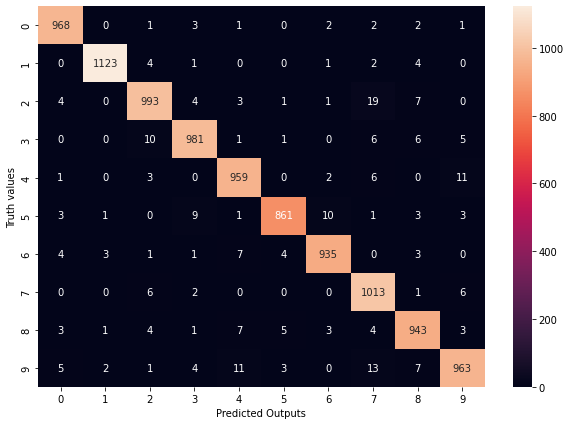

In [58]:
y_pred = model.predict(xtest)
ypred= [np.argmax(i) for i in y_pred]
con_matrix = tf.math.confusion_matrix(labels=ytest,predictions=ypred)
plt.figure(figsize=(10,7))
seaborn.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predicted Outputs')
plt.ylabel('Truth values')